In [1]:
## REQUIRED LIBRARIES 

#For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

#import matplotlib.patches as mpatches
#import matplotlib.ticker as mtick

#from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [2]:
# Read the data frame
df = pd.read_csv('BankChurners.csv', delimiter=',')
df.shape

(10127, 23)

### Exploratory Data Analysis

In [3]:
# Review the top rows of what is left of the data frame
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.drop(df.columns[[-1,-2]], axis=1, inplace=True)

In [6]:
# Check columns list and missing values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
# Get unique count for each variable
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
#Check duplicates
duplicate_entries = df[df.duplicated()]
duplicate_entries.shape

(0, 21)

In [10]:
#get insight about target
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [11]:
df.loc[df['Attrition_Flag']=='Attrited Customer', 'churn']=1
df.loc[df['Attrition_Flag']=='Existing Customer', 'churn']=0

In [12]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'churn'],
      dtype='object')

In [13]:
df.drop(columns = ['CLIENTNUM','Attrition_Flag'],inplace=True, axis=1)

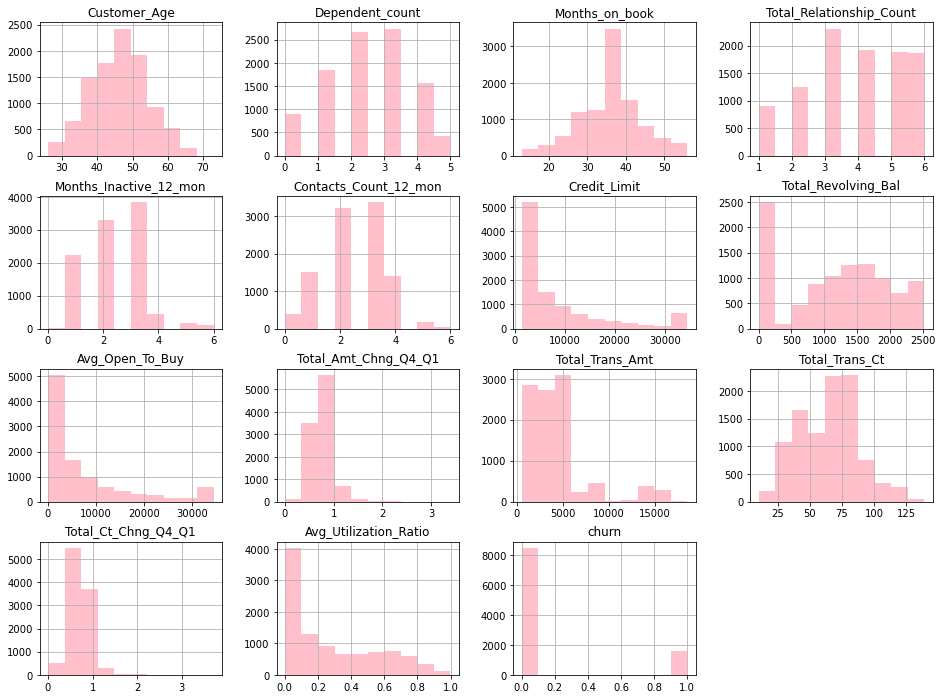

In [14]:
df.hist(bins=10, figsize=(16,12),color='pink')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [16]:
corr = df.corr()

<AxesSubplot:>

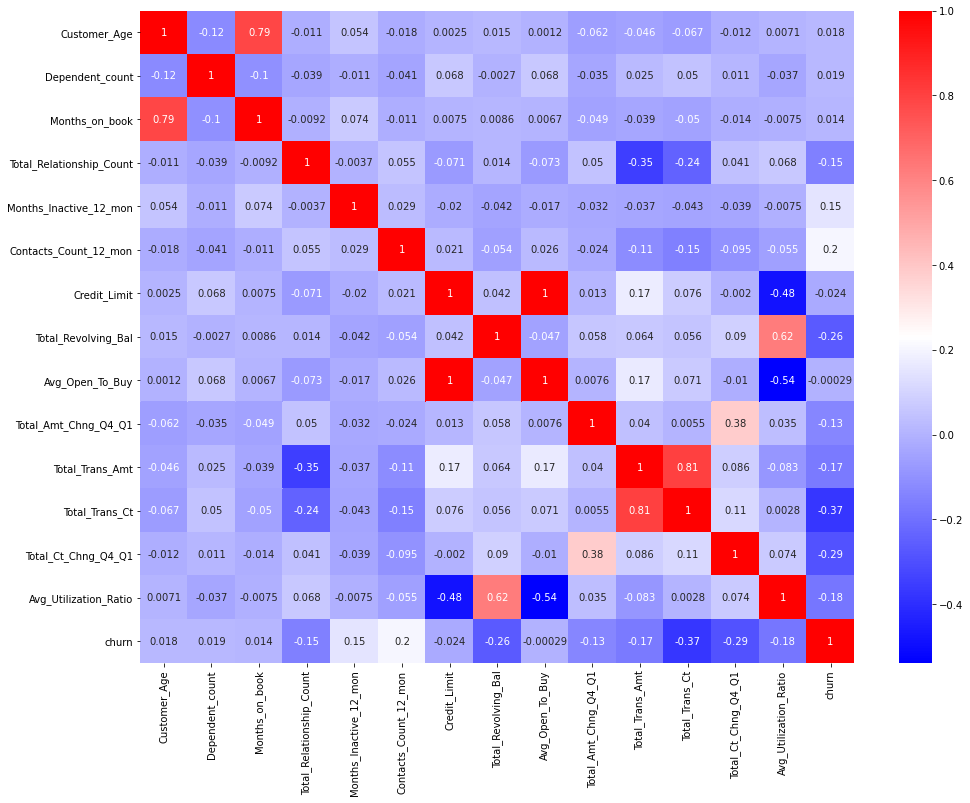

In [17]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='bwr', annot=True) # annot = True: to display the correlation value in the graph

In [18]:
df['Income_Category'] =df['Income_Category'].astype('category')

In [19]:
df['Income_Category'] = df['Income_Category'].map({'$120K +': 'A', '$80K - $120K': 'B', '$60K - $80K': 'C', '$40K - $60K': 'D', 'Less than $40K':'E', 'Unknown':'F'})

In [20]:
df['Income_Category'].nunique()

6

In [21]:
df['Education_Level'] = df['Education_Level'].astype('category')

In [22]:
df['Education_Level'].unique()

['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']

In [23]:
df['Education_Level'] = df['Education_Level'].map({'Doctorate': 'D', 'Post-Graduate': 'P', 'Graduate': 'G', 'College': 'C', 'High School':'H','Uneducated':'U', 'Unknown':'N'})

In [24]:
df.to_csv('ChurnData.csv', index=False)

In [25]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn
0,45,M,3,H,Married,C,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0
1,49,F,5,G,Single,E,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0
2,51,M,3,G,Married,B,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0
3,40,F,4,H,Unknown,E,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0
4,40,M,3,U,Married,C,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0


In [26]:
df['Income_Category'] =df['Income_Category'].astype('object')

In [27]:
df['Education_Level'] = df['Education_Level'].astype('object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

## OUTLIER ANALYSE on Numerical Variables

In [29]:
def calculate_LB_UB (df,var):
    '''calculating upper bound and lower bound values to identify outliers'''
    Q3=np.percentile(df[var],75)
    Q1=np.percentile(df[var],25)
    IQR=1.5*(Q3-Q1)
    
    UB=Q3+IQR
    LB=Q1-IQR
    
    print(LB,UB)
    
    return LB,UB

In [30]:
numerical_columns = df.select_dtypes('float64').columns

for i in numerical_columns:
  print("\n name of column:", i)
  LB, UB = calculate_LB_UB(df, i)

  print("min and max value", (df[i].min(), df[i].max()))
  print("range of outliers:", LB, UB)

  if df[i].max() > UB and df[i].min() < LB:
    print("----Investigate variable for outliers---")


 name of column: Credit_Limit
-10213.75 23836.25
min and max value (1438.3, 34516.0)
range of outliers: -10213.75 23836.25

 name of column: Avg_Open_To_Buy
-11477.25 22660.75
min and max value (3.0, 34516.0)
range of outliers: -11477.25 22660.75

 name of column: Total_Amt_Chng_Q4_Q1
0.28900000000000003 1.201
min and max value (0.0, 3.397)
range of outliers: 0.28900000000000003 1.201
----Investigate variable for outliers---

 name of column: Total_Ct_Chng_Q4_Q1
0.22799999999999998 1.172
min and max value (0.0, 3.714)
range of outliers: 0.22799999999999998 1.172
----Investigate variable for outliers---

 name of column: Avg_Utilization_Ratio
-0.697 1.2229999999999999
min and max value (0.0, 0.999)
range of outliers: -0.697 1.2229999999999999

 name of column: churn
0.0 0.0
min and max value (0.0, 1.0)
range of outliers: 0.0 0.0


<AxesSubplot:ylabel='Total_Amt_Chng_Q4_Q1'>

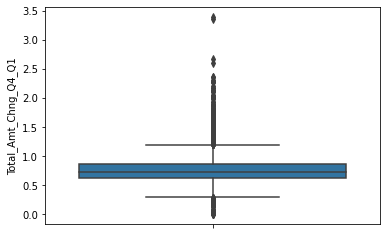

In [31]:
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', data = df)

In [32]:
df.loc[(df.Total_Amt_Chng_Q4_Q1 > 1.201) | (df.Total_Amt_Chng_Q4_Q1 <0.28),'Total_Amt_Chng_Q4_Q1'] = np.nan
df.Total_Amt_Chng_Q4_Q1.fillna(df.Total_Amt_Chng_Q4_Q1.median(),axis=0,inplace=True)

<AxesSubplot:ylabel='Total_Amt_Chng_Q4_Q1'>

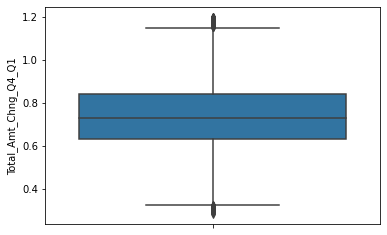

In [33]:
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', data = df)

<AxesSubplot:ylabel='Total_Ct_Chng_Q4_Q1'>

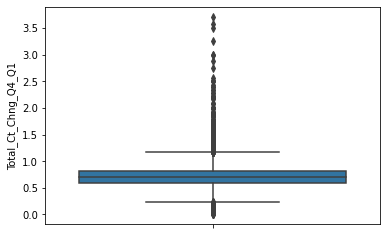

In [34]:
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', data = df)

In [35]:
df.loc[(df.Total_Ct_Chng_Q4_Q1 > 1.172) | (df.Total_Ct_Chng_Q4_Q1 <0.227),'Total_Ct_Chng_Q4_Q1'] = np.nan
df.Total_Ct_Chng_Q4_Q1.fillna(df.Total_Ct_Chng_Q4_Q1.median(),axis=0,inplace=True)

<AxesSubplot:ylabel='Total_Ct_Chng_Q4_Q1'>

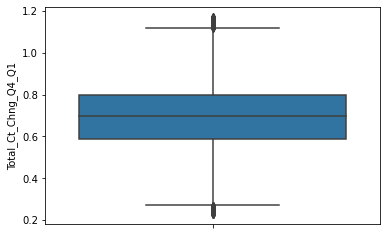

In [36]:
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', data = df)

In [37]:
df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'churn'],
      dtype='object')

### Splitting the dataset into the Training set and Test set

In [38]:
# Separate input features and output feature
# input features
X = df.drop('churn', axis=1)

# output feature
y = df.churn

In [39]:
#categorical columns
cat_cols=[col for col in X if df[col].dtypes == 'O']

In [40]:
cat_cols

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [41]:
#numerical columns
num_cols= [col for col in X.columns if str(df[col].dtypes) in ['float64', 'int64']]

In [42]:
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [43]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,H,Married,C,Blue,39,5,1,3,12691.0,777,11914.0,0.731,1144,42,0.697,0.061
1,49,F,5,G,Single,E,Blue,44,6,1,2,8256.0,864,7392.0,0.731,1291,33,0.697,0.105
2,51,M,3,G,Married,B,Blue,36,4,1,0,3418.0,0,3418.0,0.731,1887,20,0.697,0.000
3,40,F,4,H,Unknown,E,Blue,34,3,4,1,3313.0,2517,796.0,0.731,1171,20,0.697,0.760
4,40,M,3,U,Married,C,Blue,21,5,1,0,4716.0,0,4716.0,0.731,816,28,0.697,0.000


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [45]:
for col in cat_cols:
    print(X[col].unique())

['M' 'F']
['H' 'G' 'U' 'N' 'C' 'P' 'D']
['Married' 'Single' 'Unknown' 'Divorced']
['C' 'E' 'B' 'D' 'A' 'F']
['Blue' 'Gold' 'Silver' 'Platinum']


# Label Encoding for Categorical Columns

In [46]:
labelEncoder = preprocessing.LabelEncoder()
 
mapping_dict = {}
for col in cat_cols:
    X[col] = labelEncoder.fit_transform(X[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'Gender': {'F': 0, 'M': 1}, 'Education_Level': {'C': 0, 'D': 1, 'G': 2, 'H': 3, 'N': 4, 'P': 5, 'U': 6}, 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}, 'Income_Category': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}, 'Card_Category': {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}}


In [47]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,0.731,1144,42,0.697,0.061
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,0.731,1291,33,0.697,0.105
2,51,1,3,2,1,1,0,36,4,1,0,3418.0,0,3418.0,0.731,1887,20,0.697,0.000
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,0.731,1171,20,0.697,0.760
4,40,1,3,6,1,2,0,21,5,1,0,4716.0,0,4716.0,0.731,816,28,0.697,0.000


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Marital_Status            10127 non-null  int64  
 5   Income_Category           10127 non-null  int64  
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

# Model Building

In [49]:
def metrics_scoring_table(y_model,y_true, y_proba, model_name):
    prec = precision_score(y_true, y_model)
    accu = accuracy_score( y_true, y_model)
    recall = recall_score(y_true, y_model)
    f1 = f1_score(y_true, y_model)
    roc = roc_auc_score(y_true, y_proba[:, 1])
    df_score = pd.DataFrame(data= {
    "model" :  model_name,
    "accuracy score": accu,
    "precision score": prec,
    "recall score": recall,
    "f1-score": f1,
    "ROC-AUC": roc
    },
    index = [0]
    )
    return df_score

In [50]:
def roc_curve_plot(y_pred, y_true, y_pred_proba, model_name):
    y_pp = y_pred_proba[:, 1]
    fpr, tpr, threshold1 = roc_curve(y_true, y_pp )
    
    fig, ax = plt.subplots(nrows=1, ncols= 1, figsize = (7,5), constrained_layout = True)
    ax.plot(fpr, tpr, label='ROC Score: {:.5f}'.format(roc_auc_score(y_true, y_pp)))
    ax.set_title(f"{model_name} ROC Curve ", fontdict = {"fontsize": 18})
    ax.set_xlabel("False Positive Rate", fontdict = {"fontsize": 15} )
    ax.set_ylabel("True Positive Rate", fontdict = {"fontsize": 15})
    ax.legend(loc = 4, fontsize = 14 )
    #y_pred_probabilities
    plt.show()

In [51]:
def roc_summary_plot(y_true, y_proba = [], model_name = []):
    for i in range(len(y_proba)):
        
        fpr, tpr, threshold1 = roc_curve(y_true,y_proba[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("ROC scores summary (tuned model)", fontsize = 18)
        plt.xlabel("False Positive Rate" , fontdict = {"fontsize": 15})
        plt.ylabel("True Positive Rate" , fontdict = {"fontsize": 15})
        plt.plot(fpr, tpr, label='{0} ROC Score: {1}'.format(model_name[i] ,round(roc_auc_score(y_true, y_proba[i][:,1] ) ,2)))
        plt.legend(loc = 4, fontsize =13)
        #y_probability=y_proba
    plt.show()

# Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Standardization

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7088, 19)
(3039, 19)
(7088,)
(3039,)


# B a s e     M o d e l

## Logistic Regression

In [55]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

logr_y_pred = logr.predict(X_test)
logr_y_proba = logr.predict_proba(X_test)

In [56]:
metrics_scoring_table(logr_y_pred,y_test, logr_y_proba, "LogisticRegression")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.895031,0.759531,0.522177,0.618877,0.91427


In [57]:
print(classification_report(y_test, logr_y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2543
         1.0       0.76      0.52      0.62       496

    accuracy                           0.90      3039
   macro avg       0.84      0.74      0.78      3039
weighted avg       0.89      0.90      0.89      3039



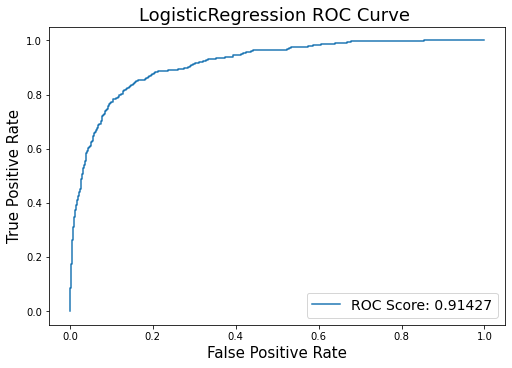

In [58]:
roc_curve_plot(logr_y_pred ,y_test, logr_y_proba, "LogisticRegression")

## K nearest Neigbors

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
knn_y_proba = knn.predict_proba(X_test)

In [60]:
metrics_scoring_table(logr_y_pred,y_test, logr_y_proba, "K Nearest Neighbors")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,K Nearest Neighbors,0.895031,0.759531,0.522177,0.618877,0.91427


In [61]:
print(classification_report(y_test, logr_y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2543
         1.0       0.76      0.52      0.62       496

    accuracy                           0.90      3039
   macro avg       0.84      0.74      0.78      3039
weighted avg       0.89      0.90      0.89      3039



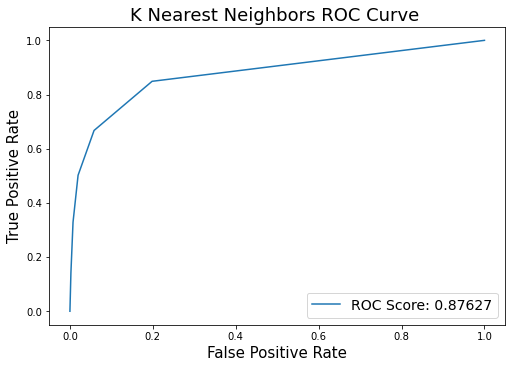

In [62]:
roc_curve_plot(knn_y_pred ,y_test, knn_y_proba, "K Nearest Neighbors")

## Decision Tree Classifier

In [63]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)
dt_y_proba = dt.predict_proba(X_test)

In [64]:
metrics_scoring_table(dt_y_pred,y_test, dt_y_proba, "Decision Tree")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree,0.928924,0.772374,0.800403,0.786139,0.877197


In [65]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2543
         1.0       0.77      0.80      0.79       496

    accuracy                           0.93      3039
   macro avg       0.87      0.88      0.87      3039
weighted avg       0.93      0.93      0.93      3039



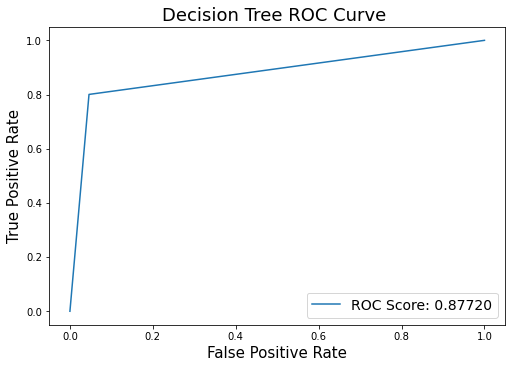

In [66]:
roc_curve_plot(dt_y_pred ,y_test, dt_y_proba, "Decision Tree")

## Random Forest

In [67]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
rf_y_proba = rf.predict_proba(X_test)

In [68]:
metrics_scoring_table(rf_y_pred,y_test, rf_y_proba, "RandomForest")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,RandomForest,0.954919,0.926366,0.78629,0.8506,0.987642


In [69]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2543
         1.0       0.93      0.79      0.85       496

    accuracy                           0.95      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.95      0.95      0.95      3039



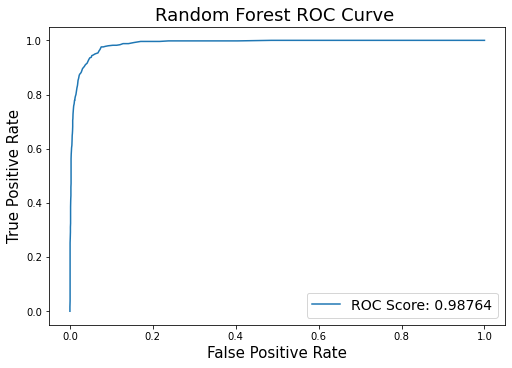

In [70]:
roc_curve_plot(rf_y_pred ,y_test, rf_y_proba, "Random Forest")

## XGBoost Classifier

In [71]:
XGB = XGBClassifier()

XGB.fit(X_train, y_train)

XGB_y_pred = XGB.predict(X_test)
XGB_y_proba = XGB.predict_proba(X_test)

/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
print(classification_report(y_test, XGB_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2543
         1.0       0.91      0.87      0.89       496

    accuracy                           0.96      3039
   macro avg       0.94      0.93      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [73]:
metrics_scoring_table(XGB_y_pred,y_test, XGB_y_proba, "XGBClassifier")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,XGBClassifier,0.964462,0.907563,0.870968,0.888889,0.991487


In [74]:
confusion_matrix(y_test,XGB_y_pred)

array([[2499,   44],
       [  64,  432]])

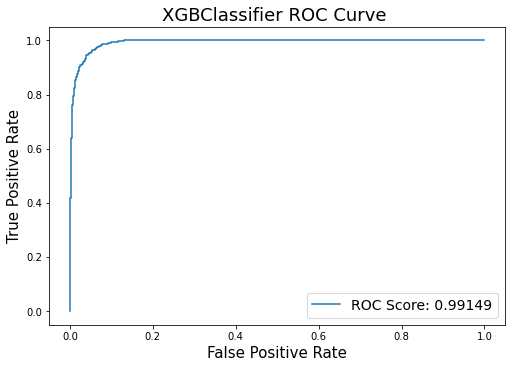

In [75]:
roc_curve_plot(XGB_y_pred ,y_test,XGB_y_proba, "XGBClassifier")

# Test overfitting

In [77]:
from sklearn.metrics import classification_report
rand_score=XGB.score(X_test, y_test)
rand_score_train=XGB.score(X_train, y_train)

#rand_score=classifier.accuracy_score(y_test,Pred)
#classification_report_XGB=classification_report(y_test,XGB_y_pred)
print("Accuracy score:",rand_score)
print("Accuracy score:",rand_score_train)

Accuracy score: 0.9644619940769991
Accuracy score: 1.0


## Model Evaluation Summary

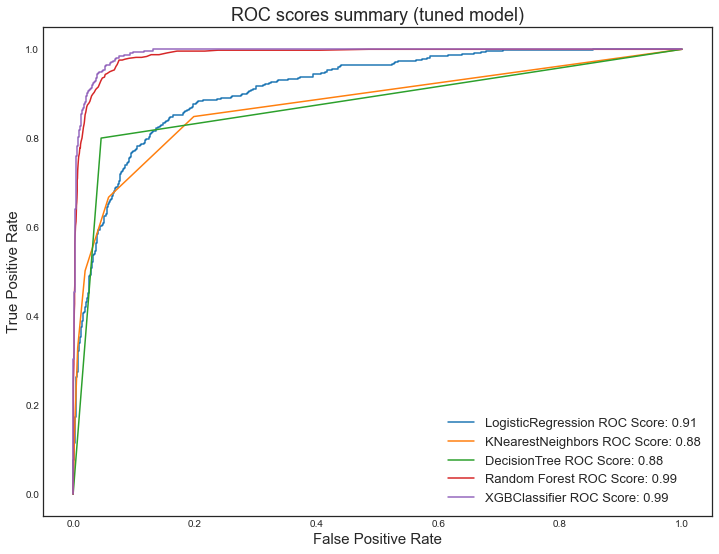

In [78]:
roc_summary_plot(y_test, [logr_y_proba, knn_y_proba, dt_y_proba, rf_y_proba, XGB_y_proba],
                         ["LogisticRegression", "KNearestNeighbors", "DecisionTree" ,"Random Forest", "XGBClassifier"])

In [79]:
score_1 = metrics_scoring_table(logr_y_pred,y_test, logr_y_proba ,"LogisticRegression")
score_2 = metrics_scoring_table(knn_y_pred,y_test, knn_y_proba ,"KNearestNeighbors")
score_3 = metrics_scoring_table(dt_y_pred,y_test, dt_y_proba ,"Decision Tree")
score_4 = metrics_scoring_table(rf_y_pred,y_test, rf_y_proba ,"RandomForest")
score_5 = metrics_scoring_table(XGB_y_pred,y_test, XGB_y_proba ,"XGBClassifier")
score = pd.concat([score_1,score_2,score_3,score_4,score_5], axis=0)
score

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.895031,0.759531,0.522177,0.618877,0.914270
0,KNearestNeighbors,0.902270,0.832776,0.502016,0.626415,0.876273
0,Decision Tree,0.928924,0.772374,0.800403,0.786139,0.877197
0,RandomForest,0.954919,0.926366,0.786290,0.850600,0.987642
0,XGBClassifier,0.964462,0.907563,0.870968,0.888889,0.991487


We chose 2 models which have the highest F1-score and ROC score and continue tuning models: RandomForest and XGBClassifier

In [ ]:
selected_feat

## Hyperparameter Tuning 

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [81]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [82]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [83]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[22:54:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.968 total time=   0.5s
[22:54:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.968 total time=   0.5s
[22:54:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.969 total time=   0.5s
[22:54:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.968 total time=   0.6s
[22:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=100;, score=0.972 total time=   0.5s
[22:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.919 total time=   0.0s
[22:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.913 total time=   0.0s
[22:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sk

[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.968 total time=   0.4s
[22:54:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.961 total time=   0.4s
[22:54:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.963 total time=   0.6s
[22:54:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.962 total time=   0.6s
[22:54:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=50;, score=0.968 total time=   0.6s
[22:54:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.946 total time=   0.1s
[22:54:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.943 total time=   0.1s
[22:54:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.944 total time=   0.1s
[22:54:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.945 total time=   0.1s
[22:54:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.944 total time=   0.1s
[22:54:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.968 total time=   0.9s
[22:54:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.966 total time=   0.9s
[22:54:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.968 total time=   0.8s
[22:54:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.965 total time=   0.7s
[22:54:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=100;, score=0.970 total time=   0.7s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.966 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.959 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.960 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.960 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sk

[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=0.968 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.946 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.929 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sk

[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.935 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.936 total time=   0.1s
[22:54:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.955 total time=   0.5s
[22:54:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.972 total time=   0.6s
[22:54:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.970 total time=   0.5s
[22:54:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.969 total time=   0.5s
[22:54:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.968 total time=   0.5s
[22:54:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.962 total time=   0.6s
[22:54:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.970 total time=   0.5s
[22:54:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.968 total time=   0.5s
[22:54:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.965 total time=   0.6s
[22:54:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.970 total time=   0.5s
[22:54:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.967 total time=   0.7s
[22:54:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.971 total time=   0.7s
[22:54:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.971 total time=   0.7s
[22:54:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.965 total time=   0.9s
[22:54:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.968 total time=   0.9s
[22:54:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [84]:
grid.best_params_

{'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.5}

In [85]:
xg_best = XGBClassifier(n_estimators= 100, max_depth= 20, learning_rate= 0.5)
xg_best.fit(X_train, y_train)

/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg_best.score(X_test, y_test)*100)

testing accuracy is :  96.41329384666008


In [87]:
xg_best.fit(X_train, y_train)

xg_best_y_pred = xg_best.predict(X_test)
xg_best_y_proba = xg_best.predict_proba(X_test)

/Users/oyakog/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [89]:
metrics_scoring_table(xg_best_y_pred,y_test, xg_best_y_proba, "XGBClassifier")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,XGBClassifier,0.964133,0.900621,0.877016,0.888662,0.990891


In [90]:
print(classification_report(y_test, xg_best_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2543
         1.0       0.90      0.88      0.89       496

    accuracy                           0.96      3039
   macro avg       0.94      0.93      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [91]:
confusion_matrix(y_test, xg_best_y_pred)

array([[2495,   48],
       [  61,  435]])

In [92]:
score_1 = metrics_scoring_table(logr_y_pred,y_test, logr_y_proba ,"LogisticRegression")
score_2 = metrics_scoring_table(knn_y_pred,y_test, knn_y_proba ,"KNearestNeighbors")
score_3 = metrics_scoring_table(dt_y_pred,y_test, dt_y_proba ,"Decision Tree")
score_4 = metrics_scoring_table(rf_y_pred,y_test, rf_y_proba ,"RandomForest")
score_5 = metrics_scoring_table(XGB_y_pred,y_test, XGB_y_proba ,"XGBClassifier")
score_6 = metrics_scoring_table(xg_best_y_pred,y_test, xg_best_y_proba, "Hyperparamater_XGB")
score = pd.concat([score_1,score_2,score_3,score_4,score_5, score_6], axis=0)
score

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.895031,0.759531,0.522177,0.618877,0.914270
0,KNearestNeighbors,0.902270,0.832776,0.502016,0.626415,0.876273
0,Decision Tree,0.928924,0.772374,0.800403,0.786139,0.877197
0,RandomForest,0.954919,0.926366,0.786290,0.850600,0.987642
0,XGBClassifier,0.964462,0.907563,0.870968,0.888889,0.991487
0,Hyperparamater_XGB,0.964133,0.900621,0.877016,0.888662,0.990891


In [ ]:
#confusion_matrix(y_test, XGB_y_pred)

## Model Tuning

### Feature Importance 

[0.03734383 0.01151311 0.01293589 0.01207441 0.00846109 0.01195987
 0.00192186 0.02869509 0.06344151 0.02502556 0.02644427 0.03613195
 0.1055311  0.03364223 0.05165329 0.20760587 0.17038655 0.0883803
 0.06685223]


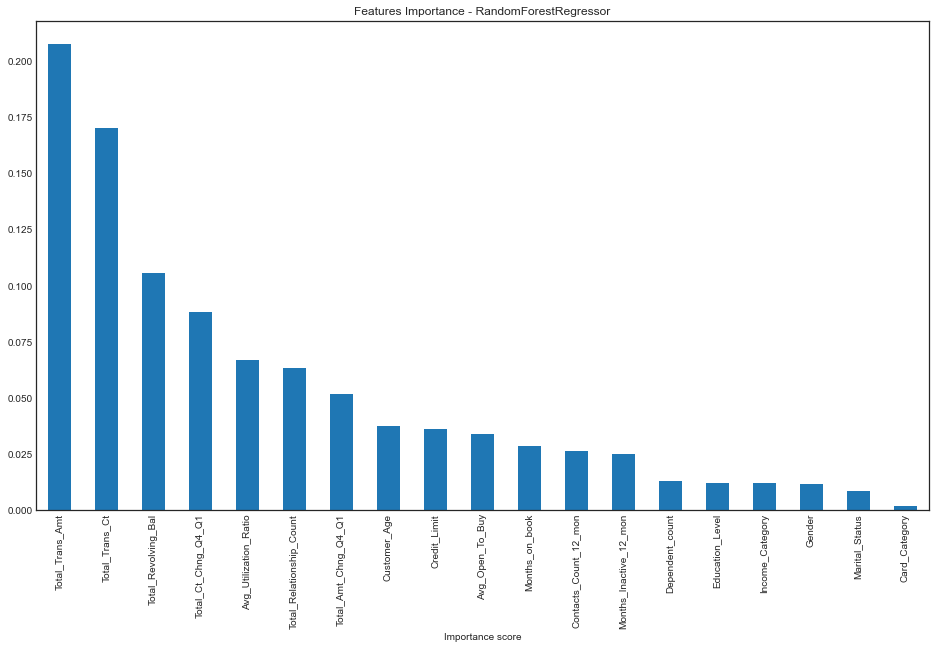

In [94]:
print(rf.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(16, 9))
feat_importances.nlargest(len(rf.feature_importances_)).plot(kind='bar')
plt.xlabel('Importance score')
plt.title('Features Importance - RandomForestRegressor')
plt.show()

In [95]:
#selected_feat = feat_importances.nlargest(len(rf.feature_importances_)).index[:7]

In [102]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator=DecisionTreeClassifier(), step = 1) 
#lr_reg
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable. 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 9
Selected Features: [ True False False False False False False  True  True False False False
  True  True  True  True  True  True False]
Feature Ranking: [ 1 11  7  9  8  6 10  1  1  4  2  3  1  1  1  1  1  1  5]


In [106]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
XGB_rfe_model = DecisionTreeClassifier().fit(X_train_rfe, y_train)

In [108]:
XGB_rfe_model_y_pred = XGB_rfe_model.predict(X_test_rfe)
XGB_rfe_model_y_proba = XGB_rfe_model.predict_proba(X_test_rfe)

In [109]:
print(classification_report(y_test, XGB_rfe_model_y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      2543
         1.0       0.80      0.76      0.78       496

    accuracy                           0.93      3039
   macro avg       0.88      0.86      0.87      3039
weighted avg       0.93      0.93      0.93      3039



In [110]:
score_1 = metrics_scoring_table(logr_y_pred,y_test, logr_y_proba ,"LogisticRegression")
score_2 = metrics_scoring_table(knn_y_pred,y_test, knn_y_proba ,"KNearestNeighbors")
score_3 = metrics_scoring_table(dt_y_pred,y_test, dt_y_proba ,"Decision Tree")
score_4 = metrics_scoring_table(rf_y_pred,y_test, rf_y_proba ,"RandomForest")
score_5 = metrics_scoring_table(XGB_y_pred,y_test, XGB_y_proba ,"XGBClassifier")
score_6 = metrics_scoring_table(xg_best_y_pred,y_test, xg_best_y_proba, "Hyperparamater_XGB")
score_7 = metrics_scoring_table(XGB_rfe_model_y_pred,y_test, XGB_rfe_model_y_proba, "Feature_Importance_Dt")
score = pd.concat([score_1,score_2,score_3,score_4,score_5, score_6, score_7], axis=0)
score

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.895031,0.759531,0.522177,0.618877,0.914270
0,KNearestNeighbors,0.902270,0.832776,0.502016,0.626415,0.876273
0,Decision Tree,0.928924,0.772374,0.800403,0.786139,0.877197
0,RandomForest,0.954919,0.926366,0.786290,0.850600,0.987642
0,XGBClassifier,0.964462,0.907563,0.870968,0.888889,0.991487
0,Hyperparamater_XGB,0.964133,0.900621,0.877016,0.888662,0.990891
0,Feature_Importance_Dt,0.930898,0.802966,0.764113,0.783058,0.863771


In [ ]:
score.to_csv('scores_of')

# Saving Model

In [111]:
import pickle
file = 'xgboost_model.pkl'
pickle.dump(xg_best, open(file, 'wb'))

In [112]:
load_model = pickle.load(open(file, 'rb'))

In [ ]:
y_prep = load_model.predict(X_test)

In [ ]:
y_prep

In [ ]:
#model with ohe,standardized,resampled
import pickle
file = 'churnnew_model.pkl'
pickle.dump(xg_best, open(file, 'wb'))  